<a href="https://colab.research.google.com/github/raoshilpa/ee188project2/blob/master/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2- ECE 188, Spring 2022 - Deadline: June 10th, 2022. Please upload a link to your Github on Gradescope.
# Train a Deep Learning model on the MNIST dataset and evaluate it on a test set.

The first part in this notebook will take you though the training of the [MNIST Dataset](http://yann.lecun.com/exdb/mnist/) which is a collection of handwritten digits. 

We will build a Deep Learning based system that can recognise handwritten digits using [Keras](https://keras.io/) and [Tensorflow](https://www.tensorflow.org/). 

Note that the entire project will be done on a Google Colab. A tutorial to some basic colab instructions can be found [here](https://colab.research.google.com/?utm_source=scs-index#scrollTo=GJBs_flRovLc). 

Note that all the code needed is provided until Task 1, **you will only have to write code after the task 1 header**

## Import Necessary Packages

We import Keras and Tensorflow to train our network and numpy to work with our data. 

We also import matplotlib to view our images. 

In [13]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers


In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.figsize'] = (8, 8)
mpl.rcParams['axes.grid'] = False


# Load the Data

We perform some data preprocessing. Feel free to skip over this and use the train and test data as x_train and x_test

In [15]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Define a model in keras.


 We define a simple simple network with 2 hidden layers. One fully connected dense layer with 8 neurons and onr flatten layer that flattens the model into 1D structure which is then fed into a softmax output.

This is a barebones keras structure. In task 1 you will be tasked with improving this model. 

In [16]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Dense(8,activation="relu"),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 28, 28, 8)         16        
                                                                 
 flatten_2 (Flatten)         (None, 6272)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                62730     
                                                                 
Total params: 62,746
Trainable params: 62,746
Non-trainable params: 0
_________________________________________________________________


## Compile and train the model 

We know train our model. Before we do that we need to set some parameters to train the model. Hence we define the loss and optimizer to be used as well as batch size. The number of epochs refers to the number of training iterations. 

In [17]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/15
422/422 [==============================] - 2s 4ms/step - loss: 2.3017 - accuracy: 0.1127 - val_loss: 2.3018 - val_accuracy: 0.1050
Epoch 2/15
422/422 [==============================] - 2s 4ms/step - loss: 2.3012 - accuracy: 0.1132 - val_loss: 2.3019 - val_accuracy: 0.1050
Epoch 3/15
422/422 [==============================] - 2s 4ms/step - loss: 2.3012 - accuracy: 0.1132 - val_loss: 2.3020 - val_accuracy: 0.1050
Epoch 4/15
422/422 [==============================] - 2s 4ms/step - loss: 2.3012 - accuracy: 0.1132 - val_loss: 2.3019 - val_accuracy: 0.1050
Epoch 5/15
422/422 [==============================] - 2s 4ms/step - loss: 2.3012 - accuracy: 0.1132 - val_loss: 2.3018 - val_accuracy: 0.1050
Epoch 6/15
422/422 [==============================] - 2s 4ms/step - loss: 2.3012 - accuracy: 0.1132 - val_loss: 2.3020 - val_accuracy: 0.1050
Epoch 7/15
422/422 [==============================] - 2s 4ms/step - loss: 2.3012 - accuracy: 0.1132 - val_loss: 2.3019 - val_accuracy: 0.1050
Epoch 

## Evaluate the model 

In [18]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Test loss: 2.301046371459961
Test accuracy: 0.11349999904632568


We achieve an accuracy on the test set of 92% but can we do better?

## Looking at a prediction.

Lets look at the prediction for a particular image in our model. We will look at one corect and one incorrect prediction and see if we can improve on the incorrect prediction. 

In [19]:
def get_mnist_label(image_probs):

  return np.argmax(image_probs), np.max(image_probs)

In [20]:
preds = model.predict(x_test)

image = x_test[0].reshape(input_shape[0], input_shape[1])
label = np.argmax(y_test[0])
image_probs = preds[0]

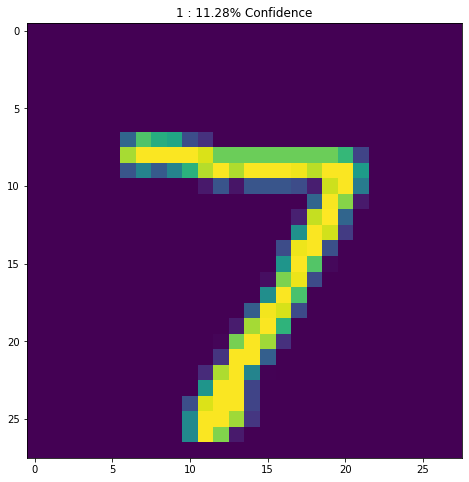

In [21]:
plt.figure()
plt.imshow(image*0.5 + 0.5)  # To change [-1, 1] to [0,1]
image_class, class_confidence = get_mnist_label(image_probs)
plt.title('{} : {:.2f}% Confidence'.format(image_class, class_confidence*100))
plt.show()


In [22]:
# Store the incorrect prediction index here
incorrect_index = 0

for i in range(preds.shape[0]):

  if np.argmax(preds[i]) != np.argmax(y_test[i]):

    incorrect_index = i

image_incorrect = x_test[incorrect_index].reshape(input_shape[0], input_shape[1])

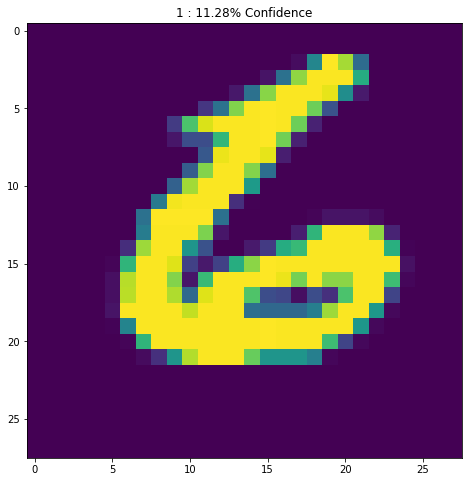

In [23]:
plt.figure()
plt.imshow(image_incorrect*0.5 + 0.5)  # To change [-1, 1] to [0,1]
image_class, class_confidence = get_mnist_label(preds[i])
plt.title('{} : {:.2f}% Confidence'.format(image_class, class_confidence*100))
plt.show()


We see that a 3 has been predicted with high confidence as a 6 does this change with our improved model below?

 # TASK 1: Improve the accuracy of the model 

Your goal in task one is to improve the accuracy of the model on the test set. 

For image recogniton tasks convolutional neural networks work better than most other type of architectures. Your goal is to push the test accuracy above 99% percent. 

The following steps will get you there. 

1. Convert the 1st hidden Dense layer to a conv layer with 32 filters, a filter size of 3x3 and with relu activation. (I've done this step)
2. Add a Maxpooling layer of size 2x2. 
3. Add another Conv layer with 64 filters, with a filter size of 3x3 with relu activation. 
4. Add a Maxpooling layer of size 2x2. 
5. Add Dropout to the layer after the Flatten layer. 

In [24]:
improved_model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
     
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        # Add Maxpooling layer here:

        # Add Conv2d layer here:

        # layers.Flatten(),
        # Add dropout of 0.5 here:

        layers.Dense(num_classes, activation="softmax"),
    ]
)

improved_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 9216)              0         
                                                                 
 dropout_1 (Dropout)         (None, 9216)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                92170     
                                                      

## Complile and train the improved model. 

In [25]:
batch_size = 128
epochs = 15

improved_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

improved_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/15
422/422 [==============================] - 13s 9ms/step - loss: 0.2516 - accuracy: 0.9262 - val_loss: 0.0679 - val_accuracy: 0.9817
Epoch 2/15
422/422 [==============================] - 4s 8ms/step - loss: 0.0798 - accuracy: 0.9757 - val_loss: 0.0557 - val_accuracy: 0.9842
Epoch 3/15
422/422 [==============================] - 4s 9ms/step - loss: 0.0617 - accuracy: 0.9810 - val_loss: 0.0468 - val_accuracy: 0.9878
Epoch 4/15
422/422 [==============================] - 4s 8ms/step - loss: 0.0515 - accuracy: 0.9843 - val_loss: 0.0498 - val_accuracy: 0.9872
Epoch 5/15
422/422 [==============================] - 4s 8ms/step - loss: 0.0441 - accuracy: 0.9864 - val_loss: 0.0454 - val_accuracy: 0.9875
Epoch 6/15
422/422 [==============================] - 4s 8ms/step - loss: 0.0382 - accuracy: 0.9876 - val_loss: 0.0415 - val_accuracy: 0.9883
Epoch 7/15
422/422 [==============================] - 4s 8ms/step - loss: 0.0343 - accuracy: 0.9891 - val_loss: 0.0409 - val_accuracy: 0.9900
Epoch

## Evaluate the Improved model. 

You should achieve a test accuracy of greater than 99%!

If not the code will throw an assertion error. 

In [26]:
score = improved_model.evaluate(x_test, y_test, verbose=0)
print("Improved Test loss:", score[0])
print("Improved Test accuracy:", score[1])

assert score[1] > 0.99

Improved Test loss: 0.03210342675447464
Improved Test accuracy: 0.9905999898910522


## Looking at a prediction.

Lets look at the prediction for a particular image in our model. We will look at one corect and one incorrect prediction and see if we can improve on the incorrect prediction. 

Check the predictions on the improved model, do you see improvements on the incorrect sample. 

In [27]:
improved_preds = improved_model.predict(x_test)

image = x_test[0].reshape(input_shape[0], input_shape[1])
label = np.argmax(y_test[0])


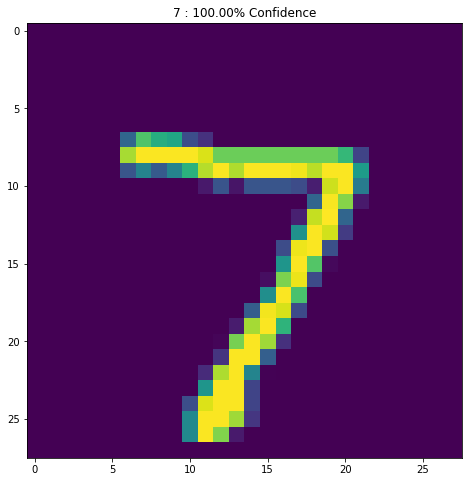

In [28]:
plt.figure()
plt.imshow(image*0.5 + 0.5)  # To change [-1, 1] to [0,1]
image_class, class_confidence = get_mnist_label(improved_preds[0])
plt.title('{} : {:.2f}% Confidence'.format(image_class, class_confidence*100))
plt.show()


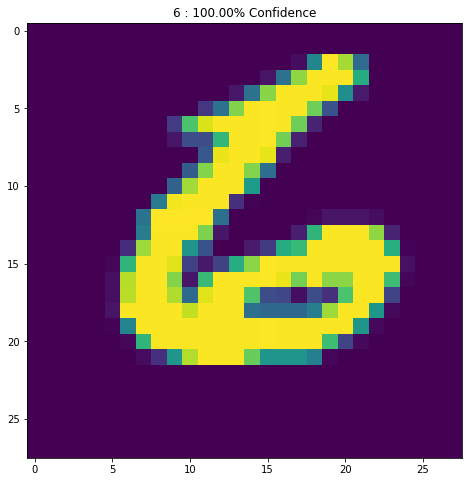

In [29]:
plt.figure()
plt.imshow(image_incorrect*0.5 + 0.5)  # To change [-1, 1] to [0,1]
image_class, class_confidence = get_mnist_label(improved_preds[i])
plt.title('{} : {:.2f}% Confidence'.format(image_class, class_confidence*100))
plt.show()


EVALUATION: I do see visible improvement. The improved model is able to correctly evalue and identify the incorrect sample.